In [1]:
%connect_info

{"key":"48030618-06a0-4f4c-b0af-09d615c2aa42","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9005,"control_port":9006,"shell_port":9007,"stdin_port":9008,"iopub_port":9009,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v3038210efc5146d173b3492d06baa90d7226eb1f9.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

%load_ext IPython.extensions.autoreload
%autoreload 2

from hypyp.wavelet.pywavelets_wavelet import PywaveletsWavelet
from hypyp.wavelet.scipy_wavelet import ScipyWavelet
from hypyp.signal import SynteticSignal



/tmp/ipykernel_20587/3173887835.py:5: DeprecationWarning: scipy.signal.morlet2 is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  wavelet = scipy.signal.morlet2(M, s, w)


integration: 18.8279144825918


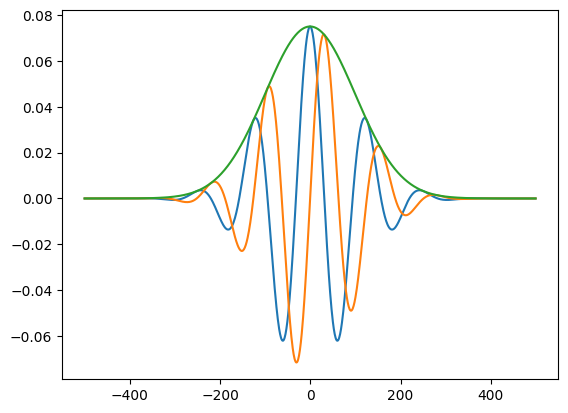

In [3]:
import scipy.signal
M = 1000
s = 100.0
w = 5.0
wavelet = scipy.signal.morlet2(M, s, w)

x = np.arange(M) - M//2

integration = np.sum(np.abs(wavelet)) * (x[1] - x[0])
print(f'integration: {integration}')

plt.plot(x, np.real(wavelet))
plt.plot(x, np.imag(wavelet))
plt.plot(x, np.abs(wavelet))

plt.show()

/tmp/ipykernel_20587/1566630312.py:9: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  W = scipy.signal.cwt(sig, scipy.signal.morlet2, widths, w=w)


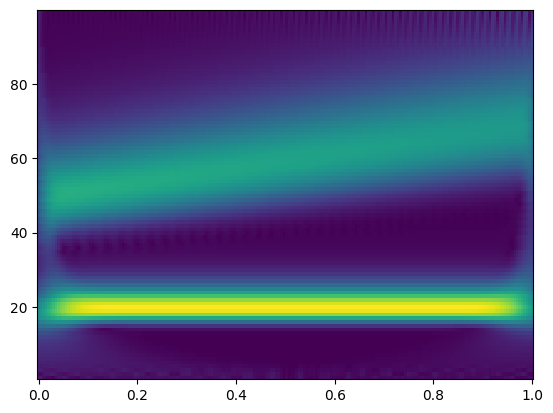

In [4]:
t, dt = np.linspace(0, 1, 200, retstep=True)
fs = 1/dt
w = 6.
sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)

freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)

W = scipy.signal.cwt(sig, scipy.signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(W))
plt.show()

In [26]:
# Grouping from LIONirs ROI

import scipy.io
import csv
from collections import OrderedDict

mat = scipy.io.loadmat('../data/lionirs/channel_grouping_7ROI.mat', struct_as_record=False)
csv_reader = csv.reader(open("../data/lionirs/Standard_Channels.txt", "r"), delimiter=',', quoting=csv.QUOTE_NONE)

row_channel_name_map = dict()

for csv_line in csv_reader:
    row_id = csv_line[0]
    source_id = csv_line[1]
    detector_id = csv_line[2]
    row_channel_name_map[row_id] = f'S{source_id}_D{detector_id} '

print(row_channel_name_map)

print(dir(mat['zone'][0][0]))
mat_rows_per_groups = mat['zone'][0][0].plotLst[0]
mat_groups = mat['zone'][0][0].label[0]


res = OrderedDict()
res_rev = OrderedDict()
for mat_rows, mat_group in zip(mat_rows_per_groups, mat_groups):
    rows = mat_rows[0]
    group_name = mat_group[0]
    res[group_name] = (rows,)
    for row in rows:
        row_id = str(row)
        res_rev[row_id] = (
            group_name,
            row_channel_name_map[row_id],
        )



print(res)
print(res_rev)

#print(mat['zone'][0][0].plotLst[0])

{'1': 'S1_D2 ', '2': 'S1_D3 ', '3': 'S1_D4 ', '4': 'S1_D9 ', '5': 'S2_D1 ', '6': 'S2_D2 ', '7': 'S2_D9 ', '8': 'S3_D1 ', '9': 'S3_D2 ', '10': 'S4_D2 ', '11': 'S4_D3 ', '12': 'S4_D4 ', '13': 'S4_D5 ', '14': 'S5_D3 ', '15': 'S5_D4 ', '16': 'S5_D5 ', '17': 'S5_D7 ', '18': 'S6_D5 ', '19': 'S6_D6 ', '20': 'S6_D7 ', '21': 'S6_D8 ', '22': 'S7_D7 ', '23': 'S7_D8 ', '24': 'S8_D6 ', '25': 'S8_D8 ', '26': 'S9_D9 ', '27': 'S9_D10 ', '28': 'S9_D11 ', '29': 'S9_D12 ', '30': 'S10_D1 ', '31': 'S10_D9 ', '32': 'S10_D10 ', '33': 'S10_D11 ', '34': 'S11_D1 ', '35': 'S11_D10 ', '36': 'S12_D10 ', '37': 'S12_D11 ', '38': 'S12_D12 ', '39': 'S12_D13 ', '40': 'S13_D11 ', '41': 'S13_D12 ', '42': 'S13_D13 ', '43': 'S13_D15 ', '44': 'S14_D13 ', '45': 'S14_D14 ', '46': 'S14_D15 ', '47': 'S14_D16 ', '48': 'S15_D15 ', '49': 'S15_D16 ', '50': 'S16_D14 ', '51': 'S16_D16 '}
['SD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__',

[<Axes: > <Axes: >]


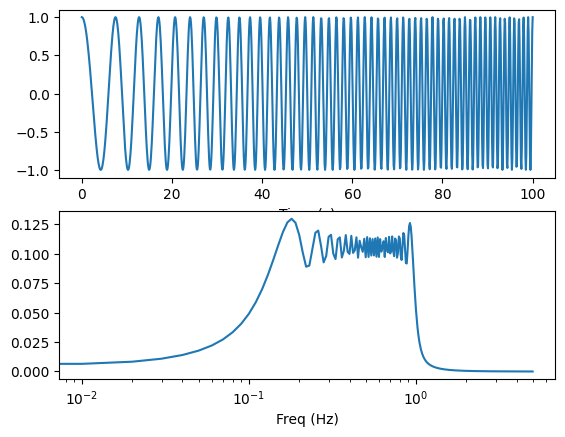

In [6]:
import matplotlib.pyplot as plt

from hypyp.profiling import TimeTracker
from hypyp.wavelet.coherence_data_frame import CoherenceDataFrame
from hypyp.wavelet.implementations.pywavelets_wavelet import PywaveletsWavelet
from hypyp.wavelet.pair_signals import PairSignals
from hypyp.signal import SyntheticSignal

foo = CoherenceDataFrame()

signal1 = SyntheticSignal()
signal1.add_chirp(0.1, 1)

fig, axes = plt.subplots(2, 1)
print(axes)
_ = signal1.plot(ax=axes[0])
_ = signal1.plot_fft(ax=axes[1])

